# Gauss-Newton example

In order to add additional functions you should 

1. Identify the functions $r_i$ in your case and put them into a Numpy array
2. Compute the Jacobian matrix: on line $i$ you have the partial derivatives of $r_i$ with respect to all variables

Note that the parameter `GN` in the `GDlinesearch` function allows you to switch between the Gauss-Newton direction and the anti-gradient one to compare the speed of convergence of the two algorithms.

Initial value: 761.0000000000003


<IPython.core.display.Javascript object>


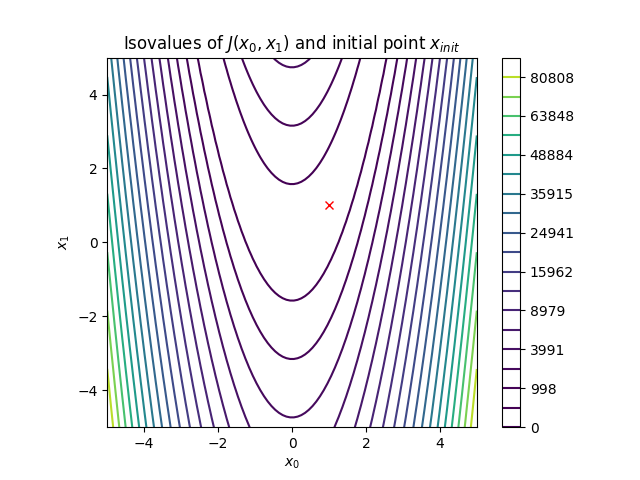

[-1208.8  -274. ]


In [21]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

x0 = np.array([-2.2, 2.1])

mult = 1

m1 = 0.1
m2 = 0.9
Tol = 5e-16
Maxiter = 2000

variant = 1


# least squares functions r_i
def r(x):
    if variant == 1:
        return np.array([10 * (x[1] - x[0]**2), 1 - x[0]])


# compute Jacobian matrix: on each line the partial derivatives w.r.t one of the variables
def Jac(x):
    if variant == 1:
        return np.array([[-20 * x[0], 10], [-1, 0]])


# objective function: sum of squares of r_i
def J(x):
    if variant == 1:
        res = r(x)
        return sum(res**2)


# gradient
def GradJ(x):
    if variant == 1:
        res = r(x)
        Jr = Jac(x)
        return Jr.T @ res


# Gauss-Newton direction
def GNdir(x):
    if variant == 1:
        res = r(x)
        Jr = Jac(x)
        Mat = Jr.T @ Jr
        try:
            d = -np.linalg.solve(Mat, Jr.T @ res)
            return d
        except:
            print("could not invert GN matrix")
            return Jr.T @ res


if variant == 1:
    analytic = [1, 1]

print("Initial value:", J(x0))

plt.figure()
xmin = min(-4, analytic[0]) - 1
xmax = max(4, analytic[0]) + 1
ymin = min(-4, analytic[1]) - 1
ymax = max(4, analytic[1]) + 1
aX0 = np.linspace(xmin, xmax, 100)
aX1 = np.linspace(ymin, ymax, 100)
Z = np.array([[J(np.array([x0, x1])) for x0 in aX0] for x1 in aX1])

contours = np.linspace(0, Z.max()**(1 / 2), 20)**2
plt.contour(aX0, aX1, Z, levels=contours)  #(np.linspace(0,30,10)**2))
plt.plot(analytic[0], analytic[1], 'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $J(x_0,x_1)$ and initial point $x_{init}$')
plt.show()

print(GradJ(x0))

In [22]:
def GDlinesearch(f, df, x0, tol, maxiter, m1, m2, GN=1):
    phist = []
    vhist = []
    ghist = []
    phist.append(x0)  # Create an array which holds the optimization history

    val = f(x0)
    gd = df(x0)
    vhist.append(val)
    ghist.append(gd)
    iter = 0
    step = 0.1
    prevval = val
    d = gd
    while abs(np.linalg.norm(gd)) >= Tol:
        iter = iter + 1
        #Line search
        tl = 0
        tr = 0
        t = 1
        step = t
        # choice of the descent direction
        if GN == 1:
            d = GNdir(x0)
        else:
            d = -gd

        #np.sqrt(abs((f(x0+step*d,v)-val)))/step<np.sqrt(abs(-(m1*(d*d))))
        while (1 == 1):
            qt = f(x0 + t * d)
            qp = np.dot(gd, d)
            qd = df(x0 + t * d)
            #print(tl," ",tr)
            if ((qt - val) / t <= (m1 * qp)) and (np.dot(qd, d) >= (m2 * qp)):
                step = t  # we found a good step
                break
            if ((qt - val) / t > (m1 * qp)):
                # step too big
                tr = t
            if ((qt - val) / t < (m2 * qp)):
                # step too small
                tl = t
            if (tr == 0):
                t = 2 * tl
            else:
                t = 0.5 * (tl + tr)
            if abs(tr - tl) < 1e-15 * tr or tr < 1e-15:
                break
        if (np.linalg.norm(step * d) / np.linalg.norm(x0) < Tol):
            print("Too small change!")
            #d = -gd
            #step = 0.1
            break
        x0 = x0 + step * (d)
        val = f(x0)
        gd = df(x0)

        if (iter % 10 == 0):
            print("Iter: ", iter, "| Val: ", val, "| Step: ", step, " Grad: ",
                  abs(np.linalg.norm(gd)))
        phist.append(x0)
        vhist.append(val)
        ghist.append(d)
        if (iter > maxiter):
            print('Maximum number of iterations reached!')
            break
        #if(abs(val-prevval)<Tol):
        #print('Function does not decrease enough!')
        #break
        prevval = val
    if (np.linalg.norm(d) < Tol):
        print('Algorithm converged!')
    print('')
    print('Final output:')
    print("Iter: ", iter, "| Val: ", val, "| Step: ", step, " Grad: ",
          abs(np.linalg.norm(gd)))
    return phist, vhist, ghist


In [23]:
pp,vv,gg = GDlinesearch(J,GradJ,x0,Tol,Maxiter,m1,m2,GN=1)

print('Number of iterations: ',len(pp))
print('Final position: ',pp[-1])
print('Difference to analytical sol: ',np.linalg.norm(analytic-pp[-1]))




Final output:
Iter:  6 | Val:  0.0 | Step:  1  Grad:  0.0
Number of iterations:  7
Final position:  [1. 1.]
Difference to analytical sol:  0.0


<IPython.core.display.Javascript object>


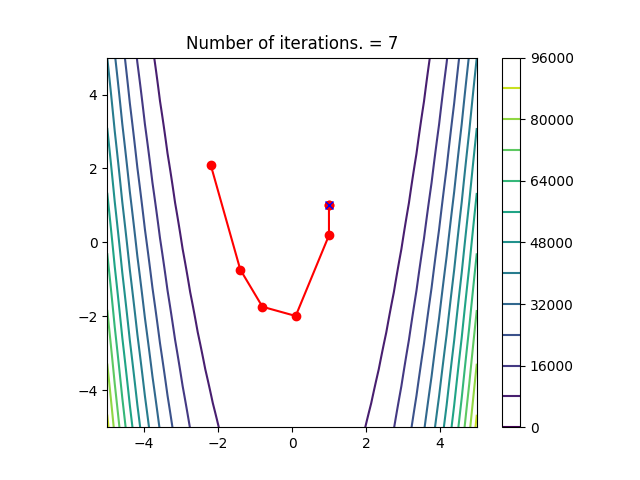

In [24]:
plt.figure(dpi=100)
#print(vv)
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in pp]
lx1=[X[1] for X in pp]
plt.plot(lx0,lx1,"-ro")

plt.plot(analytic[0],analytic[1],'-bx')


plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()


plt.show()

<IPython.core.display.Javascript object>


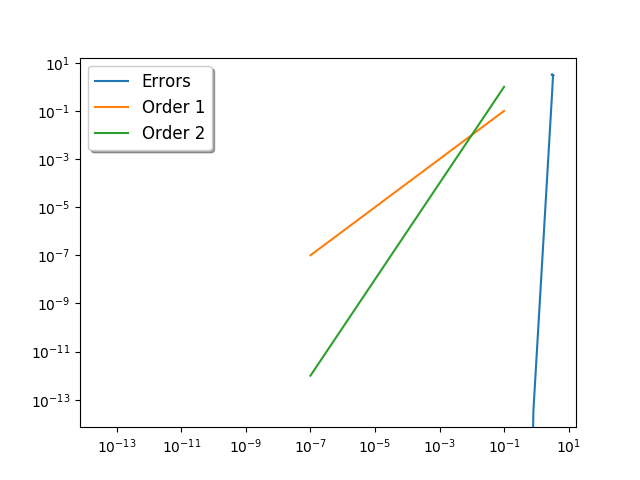

In [25]:
Niter = len(pp)
dis = np.linspace(1,Niter,Niter+1)

errors=[np.sqrt((X[0]-analytic[0])**2+(X[1]-analytic[1])**2) for X in pp]
#print(errors)

if(dis.size>10):
    dis2 = dis[0:10]
else:
    dis2 = dis
sq  = 0.1**dis2
lam = 0.5*(1+np.sqrt(5))
sq2 = 100*sq**2
sq3 = 100*sq**3
sqlam = 100*sq**lam

plt.figure()
#fig, ax = plt.subplots()

plt.loglog(errors[:-1:],errors[1:],label='Errors')
plt.loglog(sq,sq,label='Order 1')

plt.loglog(sq,sq2,label='Order 2')
#plt.loglog(sq,sq3,label='Order 3')

plt.legend(loc='best', shadow=True, fontsize='large')
plt.show()